# Part I - (Ford GoBike System Data Exploration)
## by (Jamilu Ibrahim Richifa)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. I It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco.


## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from jupyterthemes import jtplot
jtplot.style(theme='grade3')
import glob
import os
import datetime
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

> load data set.


In [3]:
#load dataset 
df_bikeShare = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
df_bikeShare 

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [5]:
# Basic info of the dataset
df_bikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
#Value counts of user type
df_bikeShare.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [7]:
# Value counts of share of all trip
df_bikeShare.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [8]:
# Value counts of gender
df_bikeShare.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [9]:
# Check for duplicates 
df_bikeShare.duplicated().sum()

0

In [10]:
df_bikeShare.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [11]:
#Sampling the data to get a feel for the dataset
df_bikeShare.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
66474,1277,2019-02-20 08:30:11.2710,2019-02-20 08:51:28.3510,72.0,Page St at Scott St,37.772406,-122.435650,343.0,Bryant St at 2nd St,37.783172,-122.393572,5487,Subscriber,1996.0,Male,No
85178,565,2019-02-17 15:48:55.7030,2019-02-17 15:58:20.9080,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,5030,Customer,1993.0,Female,No
89922,1285,2019-02-16 14:00:27.7560,2019-02-16 14:21:52.9510,375.0,Grove St at Masonic Ave,37.774836,-122.446546,386.0,24th St at Bartlett St,37.752105,-122.419724,4964,Customer,1991.0,Male,No
26343,751,2019-02-25 12:40:20.9700,2019-02-25 12:52:52.5450,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,6576,Subscriber,1991.0,Male,No
172976,804,2019-02-03 13:53:22.6610,2019-02-03 14:06:47.0820,53.0,Grove St at Divisadero,37.775946,-122.437777,47.0,4th St at Harrison St,37.780955,-122.399749,4804,Subscriber,1981.0,Male,No


In [12]:
# descriptive statistics for numeric variables
df_bikeShare.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [13]:
df_bikeShare.shape

(183412, 16)

In [14]:
#Lets save the data for cleaning purpose
df_bikeShare_copy = df_bikeShare.copy()

### Data Cleaning

###### Problem 1

Define
>Drop missing valuex


Code

In [15]:
#Drop missing valuex
df_bikeShare_copy.dropna(inplace=True)

Test

In [16]:
#check for missing values
df_bikeShare_copy.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

###### Problem 2

#### Define
> Some of the columns data type format are incorrect hence need to be corrected to the appropriaate format

#### Code

In [17]:
# assign proper data types to the start_time and end_time
df_bikeShare_copy['start_time'] = pd.to_datetime(df_bikeShare_copy['start_time'])
df_bikeShare_copy.end_time = pd.to_datetime(df_bikeShare_copy.end_time)

In [18]:
# Correcting  the bike_id, start_station_id, and end_station_id format to string
df_bikeShare_copy.bike_id = df_bikeShare_copy.bike_id.astype(str)
df_bikeShare_copy.start_station_id = df_bikeShare_copy.start_station_id.astype(str)
df_bikeShare_copy.end_station_id = df_bikeShare_copy.end_station_id.astype(str)

In [19]:
# Correcting the user_type, member_gender, and bike_share_for_all_trip format to category
df_bikeShare_copy.user_type = df_bikeShare_copy.user_type.astype('category')
df_bikeShare_copy.member_gender = df_bikeShare_copy.member_gender.astype('category')
df_bikeShare_copy.bike_share_for_all_trip = df_bikeShare_copy.bike_share_for_all_trip.astype('category')

In [20]:
#Correcting the member birth year
df_bikeShare_copy['member_birth_year'] = df_bikeShare_copy['member_birth_year'].astype(int) 

#### Test

In [21]:
df_bikeShare_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

###### Problem 3

Define
>Get the age of the members

Code

In [22]:
#Get the age of members from the member_birth_year column
df_bikeShare_copy['member_age'] = 2019-df_bikeShare_copy['member_birth_year']

Test

In [23]:
df_bikeShare_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30


In [24]:
df_bikeShare_copy.member_age.value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
91         1
141        1
89         1
109        1
92         1
Name: member_age, Length: 75, dtype: int64

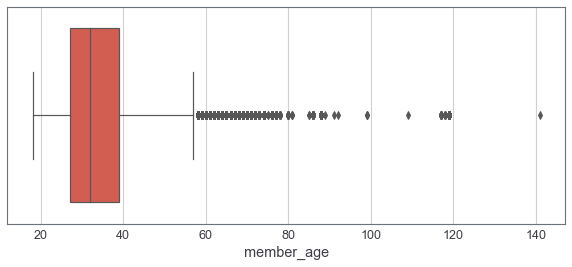

In [25]:
# Checking age outliers using box plot 

plt.figure(figsize = [10, 4])
base_color = sb.color_palette()[9]
sb.boxplot(data=df_bikeShare_copy, x='member_age', color=base_color);

In [26]:
# Age only 80 and below
df_bikeShare_copy= df_bikeShare_copy.query('member_age <= 80')

In [27]:
df_bikeShare_copy.member_age.describe()

count    174760.000000
mean         34.125223
std           9.877739
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

Define
>Add new columns of date and time  for further analysis

Code

In [28]:
# Extract the start time of the month name
df_bikeShare_copy['start_time_month_name']= df_bikeShare_copy['start_time'].dt.strftime('%B')

In [29]:
# Extract the start time month number
df_bikeShare_copy['start_time_month_number']= df_bikeShare_copy['start_time'].dt.month.astype(int)

In [30]:
# Extract the  start time weekdays
df_bikeShare_copy['start_time_weekday']= df_bikeShare_copy['start_time'].dt.strftime('%a')

In [31]:
# Extract the  the start time day
df_bikeShare_copy['start_time_day']= df_bikeShare_copy['start_time'].dt.day.astype(int)

In [32]:
# Get the start time hour
df_bikeShare_copy['start_time_hour']= df_bikeShare_copy['start_time'].dt.hour

In [33]:
# Get the start time hour
df_bikeShare_copy['end_time_hour'] = df_bikeShare_copy['end_time'].dt.hour

In [34]:
# Duration in  minutes
df_bikeShare_copy['duration_min'] = df_bikeShare_copy['duration_sec']/60
df_bikeShare_copy['duration_min'] = df_bikeShare_copy['duration_min'].astype(int)

Test

In [35]:
#Load data set
df_bikeShare_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month_number,start_time_weekday,start_time_day,start_time_hour,end_time_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,35,February,2,Thu,28,17,8,869
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,47,February,2,Thu,28,12,5,1030
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,30,February,2,Thu,28,17,4,608


Problem 4 <br>

Define<br>


Creating distance columns

Code

In [36]:
df_bikeShare_copy['distance_in_miles'] = 3958.756 * 2 * \
np.arcsin(np.sqrt(np.sin((np.radians(df_bikeShare_copy['end_station_latitude']) - np.radians(df_bikeShare_copy['start_station_latitude']))/2)**2 + \
                  np.cos(np.radians(df_bikeShare_copy['start_station_latitude'])) 
                * np.cos(np.radians(df_bikeShare_copy['end_station_latitude'])) * 
                  np.sin((np.radians(df_bikeShare_copy['end_station_longitude']) - np.radians(df_bikeShare_copy['start_station_longitude']))/2)**2))

Test

In [37]:
df_bikeShare_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month_number,start_time_weekday,start_time_day,start_time_hour,end_time_hour,duration_min,distance_in_miles
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,No,35,February,2,Thu,28,17,8,869,0.338466
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,No,47,February,2,Thu,28,12,5,1030,1.680526


In [38]:
df_bikeShare_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  object        
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  object        
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  object        
 12  user_type       

In [39]:
df_bikeShare_copy.shape

(174760, 25)

In [40]:
#Save clean data 
df_bikeShare_copy.to_csv('df_bikeShare.csv', index=False)

### What is the structure of your dataset?

>The data have 174760 rides with 25 features which include 'duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip', distance_in_miles,duration_min, end_time_hour,start_time_hour,start_time_weekday, member_age,start_time_month_number , start_time_month_name. Most variables are numeric in nature while some variables like the start_time and end_time have the wrong data types instead of the datetime, end_station_id is in float format.

### What is/are the main feature(s) of interest in your dataset?

>One of the most interesting feature to explore will be the date and time for the rental traffic.

>duration_sec and duration in minute, start_time, distance_in_miles, start_time_hour,start_station_name and user_type are also key columns which will help us explore the bike rental traffic and gender from the dataset.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The  features in the dataset I think will help support the investigation in the  feature(s) of interest are trip duration willt effect on each the start stations and end stations . I also think that user_type, age, and gender may have effects on trip duration.

## Univariate Exploration




### 1 Usage of Bike Per Hours

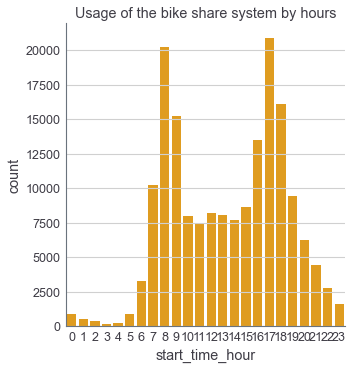

In [40]:
sb.catplot(x="start_time_hour",data=df_bikeShare_copy, kind='count', color='orange').set(title='Usage of the bike share system by hours')
plt.show()

The hourly distribution is bimodal, which shows the use of bike system mostly around 8-9am and 5-6pm for opening and closing of work

**2 Age distribution among members**

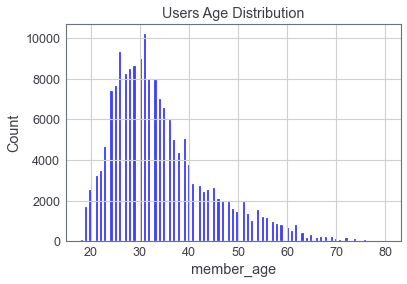

In [41]:

sb.histplot(data=df_bikeShare_copy,x='member_age', hue=None, 
            weights=None, stat='count', bins='auto', 
            color='blue').set(title="Users Age Distribution");

Median age aroung 33 years

**3 Users between subcribers Vs Customers**

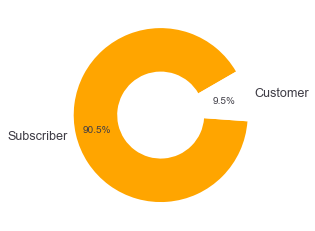

In [42]:
plt.pie(df_bikeShare_copy['user_type'].value_counts(),
        autopct = '%1.1f%%',
        startangle = 30,
        labels = df_bikeShare_copy['user_type'].value_counts().index,
        pctdistance = 0.75,
        wedgeprops = {'width' : 0.5},
       colors=
           ['orange', 'white']);

There is 90.5% of users from subscribers comapare to customers

**4 Which Day With The Most Rent**

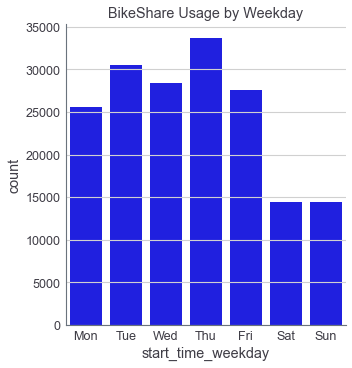

In [43]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.catplot(x='start_time_weekday',
            data =df_bikeShare_copy,
             kind='count', color = "blue", order = weekday).set(title="BikeShare Usage by Weekday");

Tuesday, Wednesdyas and Thursdays are the days with the most rentals

**5 Gender with Highest Bike Sharing System**


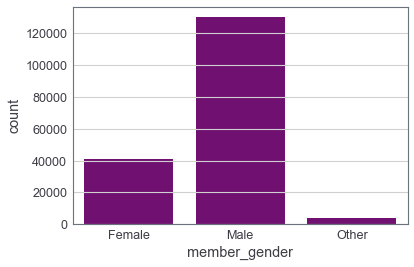

In [44]:
sb.countplot(data = df_bikeShare_copy, x = 'member_gender', color = "purple");

Male are the highest users of the bikeshare system followed by females

**6 Proportion of bikeshare scheme**

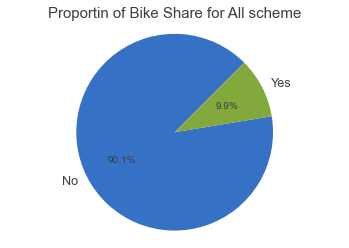

In [45]:
share = df_bikeShare_copy.bike_share_for_all_trip.value_counts()[0]
share_all = df_bikeShare_copy.bike_share_for_all_trip.value_counts()[1]
all_scheme = share+share_all
plt.pie([share /all_scheme *100, share_all/all_scheme *100], autopct='%1.1f%%', labels=['No', 'Yes'], startangle=45)
plt.title("Proportin of Bike Share for All scheme", fontsize=15)
plt.axis('equal')
plt.show()


Only 9.9 percent of Users applied for all the bike share scheme

**7 User Birth Year**

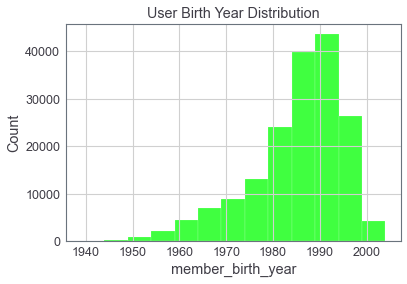

In [46]:
sb.histplot(data=df_bikeShare_copy, x='member_birth_year', color="lime", bins=50, 
            binwidth=5).set(title="User Birth Year Distribution");

Most of the users birth year are born between 1980 to 2000

**8 Rent Time Spent In Minute**

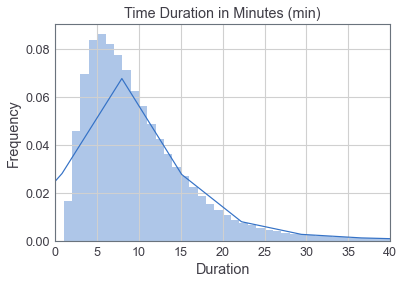

In [47]:
bins = np.arange(0, df_bikeShare_copy['duration_min'].max()+1, 1)
sb.distplot(df_bikeShare_copy['duration_min'], bins=bins)
plt.xlim([0,40])
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Time Duration in Minutes (min)')
plt.show()

Users usually spent from 5 to 15 minute of the bike share rent

**9 Most Popular Station**

In [48]:
#Import the counter method
from collections import Counter 

In [49]:
#Print out the most common station in dictionary format
print(dict(Counter( df_bikeShare_copy['start_station_name']).most_common(10)))

{'Market St at 10th St': 3648, 'San Francisco Caltrain Station 2  (Townsend St at 4th St)': 3394, 'Berry St at 4th St': 2951, 'Montgomery St BART Station (Market St at 2nd St)': 2709, 'Powell St BART Station (Market St at 4th St)': 2620, 'San Francisco Caltrain (Townsend St at 4th St)': 2569, 'San Francisco Ferry Building (Harry Bridges Plaza)': 2539, 'Howard St at Beale St': 2216, 'Steuart St at Market St': 2181, 'Powell St BART Station (Market St at 5th St)': 2143}


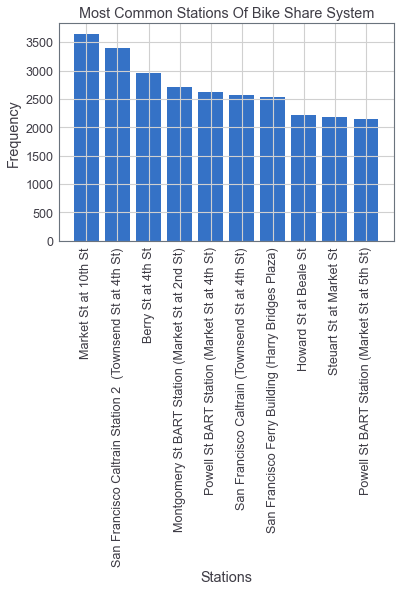

In [50]:
#Plot bar chart for the most common stations 
stations_dict = dict(Counter(df_bikeShare_copy['start_station_name']).most_common(10))
plt.bar(stations_dict.keys(), stations_dict.values())
plt.xlabel('Stations')
plt.ylabel('Frequency')
plt.title('Most Common Stations Of Bike Share System')
plt.xticks(rotation=90)
plt.show()

Most popular stations are the Market St and San francisco caltrian station 2

## Bivariate Exploration


**10 Start and End Time Rentals By Hours**

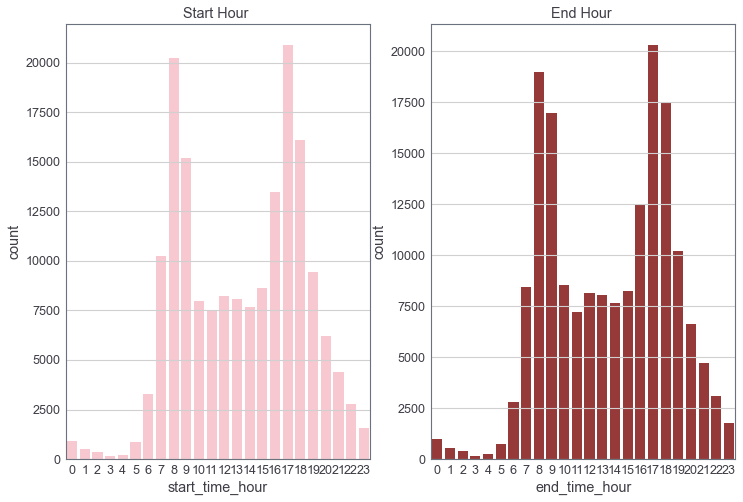

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[12, 8])
sb.countplot(data = df_bikeShare_copy, x = 'start_time_hour', ax=ax[0], color='pink').set(title="Start Hour ");
sb.countplot(data = df_bikeShare_copy, x = 'end_time_hour', ax=ax[1],color='brown').set(title="End Hour ");
plt.show()


The distribution for the both are similar but most rentals are from 7am to 9am morning and 4pm to 6pm evening

**11 User Type Comapre With Duration Of Trips In Second**

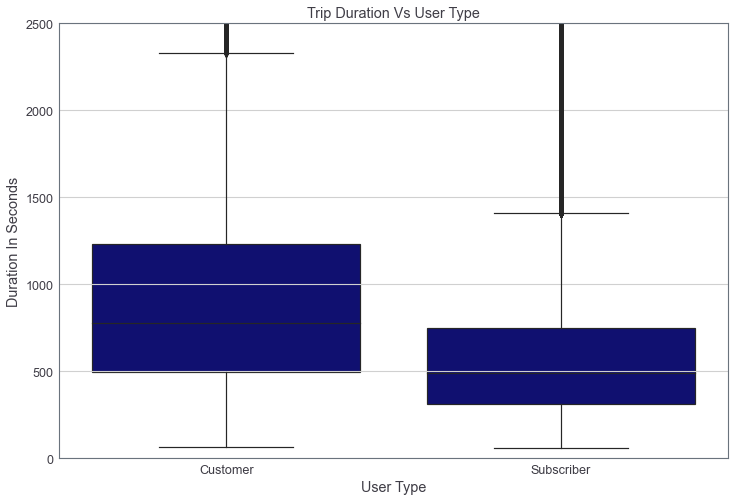

In [77]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df_bikeShare_copy, x = 'user_type', y = 'duration_sec', 
           color = 'navy').set(title="Trip Duration Vs User Type")
plt.ylim([0, 2500])
plt.xlabel('User Type')
plt.ylabel('Duration In Seconds')
plt.show()

The  percentage of customer rides is longer than subscriber although number of subscriber riders are very high than customer in seconds.

**12 Use Of Bikeshare System In Weekdays By Users(Customers Vs Subscriber)**

[Text(0.5, 1.0, 'Customer Usage by Weekday vs. Subscriber Usage by Weekday')]

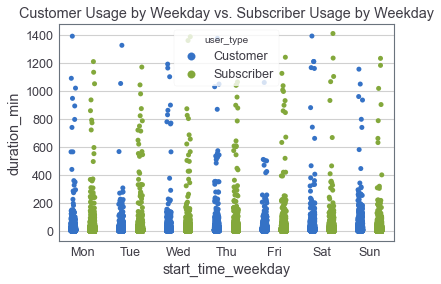

In [78]:
# Customer Usage by Weekday vs. Subscriber Usage by Weekday
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.stripplot(x ='start_time_weekday', y ='duration_min', data = df_bikeShare_copy,
              jitter = True, hue ='user_type', dodge = True, 
             order=days).set(title="Customer Usage by Weekday vs. Subscriber Usage by Weekday")

Subribers  slightly have longer duration than customers

**13 Age Of Users Type(Customers Vs Subscrivers)**

Text(0.5, 1.0, 'Ford GBike System - Customers vs. Subscribers Ages')

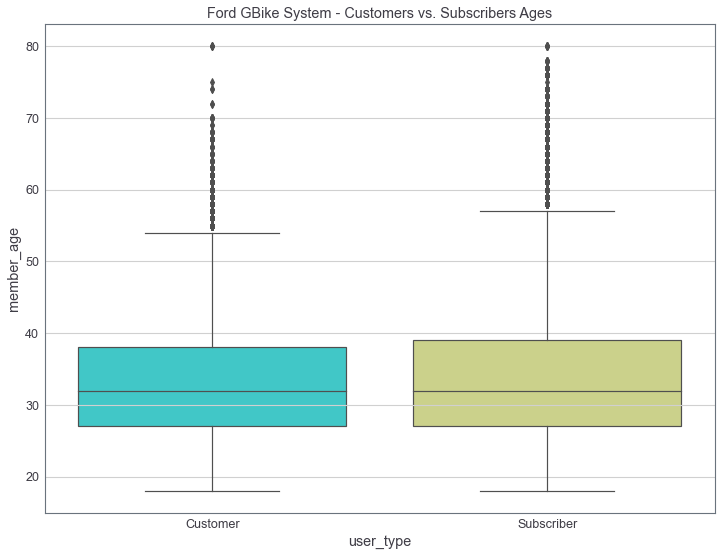

In [79]:
plt.figure(figsize=(12,9))
sb.boxplot(x='user_type',y='member_age',data=df_bikeShare_copy, palette='rainbow')
plt.title('Ford GBike System - Customers vs. Subscribers Ages')

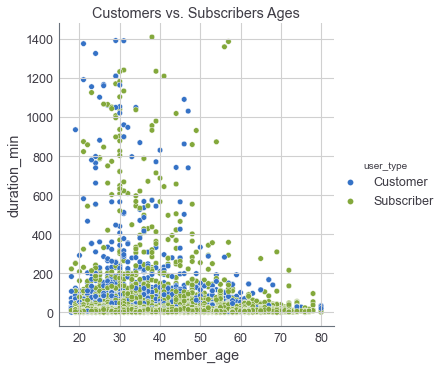

In [80]:
sb.relplot(x="member_age", y="duration_min", hue="user_type", data=df_bikeShare_copy,  
           sizes=(15, 200)).set(title="Customers vs. Subscribers Ages")

24-40 age are the highest among customers and subcribers of the user type 

## Multivariate Exploration



**14 Trip duration variation in days between customers and subscribers**

<AxesSubplot:xlabel='start_time_weekday', ylabel='duration_min'>

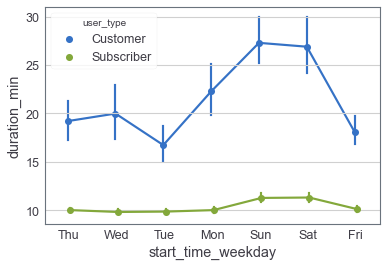

In [54]:
#Users Trip Duration
sb.pointplot(data=df_bikeShare_copy, x="start_time_weekday", y="duration_min", 
             hue="user_type", dodge=True)

Customers have more longer trip minute spend than susbcribers however there is increase on both user type trip duration in weekends 

**15 Duration Of Trip By Age**

<AxesSubplot:xlabel='member_age', ylabel='duration_sec'>

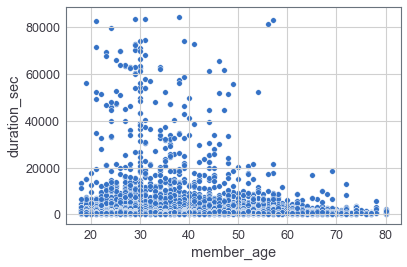

In [57]:
sb.scatterplot(data=df_bikeShare_copy, x="member_age", y="duration_sec")

The most frequent users aged between 20 and 45

**16 Average Distance By User Type Based On Gender**

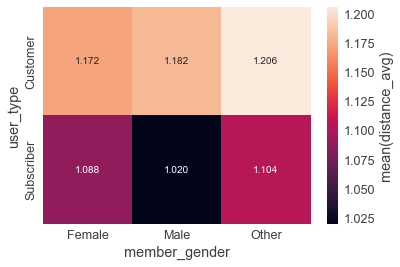

In [41]:
avg_dist = df_bikeShare_copy.groupby(['member_gender', 'user_type']).mean()['distance_in_miles']
avg_dist = avg_dist.reset_index(name = 'distance_avg')
avg_dist = avg_dist.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'distance_avg')
sb.heatmap(avg_dist, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(distance_avg)'});

Male Customers have highest distance than the  in susbcribers which females have highest distance than the males 

#### 17 Curelation between the data colomns

<AxesSubplot:>

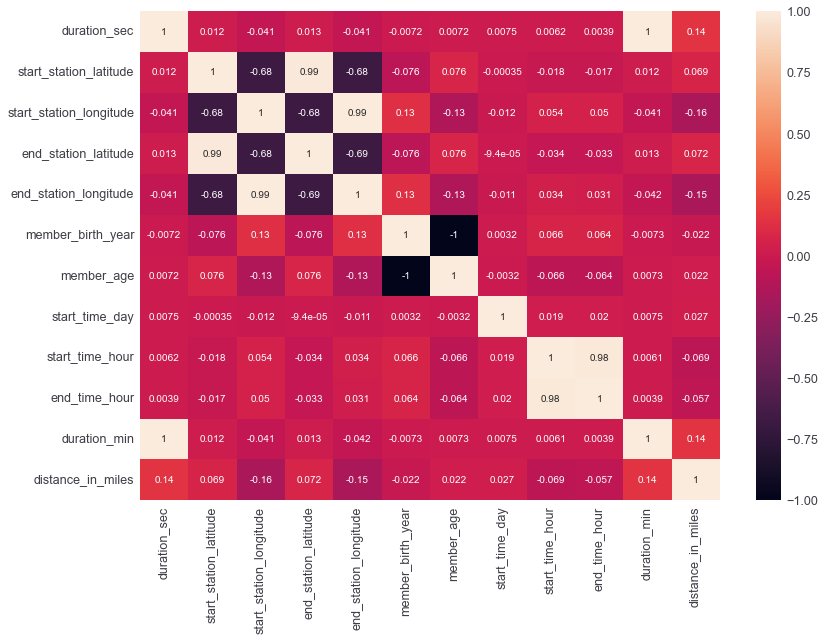

In [107]:
corr = df_bikeShare_copy.corr()
plt.figure(figsize=(13,9))
sb.heatmap(data=corr, annot=True)

Most of the data columns indicate negative correlation or no correlation

#### 18 Duration in minute By Age Of The Users

<AxesSubplot:xlabel='member_age', ylabel='duration_min'>

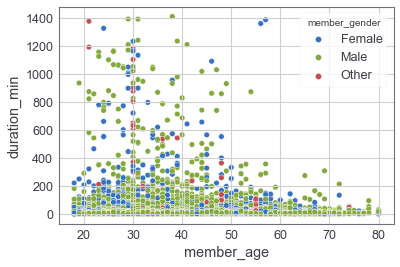

In [42]:
sb.scatterplot(df_bikeShare_copy["member_age"], df_bikeShare_copy["duration_min"], hue=df_bikeShare_copy["member_gender"])

Longer durations of bikeshare users are young which are mostly male then follows by female

## Conclusions
>In the exploration process, I wanted to explore the  time of maximum bike rentals, the age of the users, user type either customers or subscirbers and the most frequent station using univariate plots.Then using bivariate plots I further the exploration to using bivariate to plot the start and end time rentals by hours then explore the time by gender category,
then comapre the user type based on duration, gender, age, hourse spend and weekdays
>Finally, I investigated further using multivariate plots to find  the most time user type use the bikesahre system during the weekdays in which 7-9am and 4-6pm are most frequent time, then i find out Male users have highest duration than the in susbcribers which females have highest distance than the males.


**Summary OF the Main Findings From The Dataset**

1 Most hour time usage of the bikeshare system is around 8-9am and 5-6pm for opening and closing of work

2 The Station that has the most rental is  Market St then followed by  San francisco caltrian station 

3 The  percentage of customer rides is longer than subscriber although number of subscriber is higher

4 Males rent duration is higher than the females rent duration

5 Most of the rent users age are young people ranging  between 20 and 45